# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [2]:
from  pandas_datareader import data as web

import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np
import yfinance as yf

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [34]:
ativos = ['^BVSP', 'BTC-USD', 'BRL=X']

dt_srt, dt_end = '2020-01-01', '2024-09-16'

yframe = yf.download(ativos, 
                    start = dt_srt, 
                    end = dt_end)
yframe

[*********************100%***********************]  3 of 3 completed


Price                     Adj Close                             Close  \
Ticker                        BRL=X       BTC-USD     ^BVSP     BRL=X   
Date                                                                    
2020-01-01 00:00:00+00:00  4.016786   7200.174316       NaN  4.016786   
2020-01-02 00:00:00+00:00  4.016300   6985.470215  118573.0  4.016300   
2020-01-03 00:00:00+00:00  4.023400   7344.884277  117707.0  4.023400   
2020-01-04 00:00:00+00:00       NaN   7410.656738       NaN       NaN   
2020-01-05 00:00:00+00:00       NaN   7411.317383       NaN       NaN   
...                             ...           ...       ...       ...   
2024-09-11 00:00:00+00:00  5.662900  57343.171875  134677.0  5.662900   
2024-09-12 00:00:00+00:00  5.667400  58127.011719  134029.0  5.667400   
2024-09-13 00:00:00+00:00  5.625700  60571.300781  134882.0  5.625700   
2024-09-14 00:00:00+00:00       NaN  60005.121094       NaN       NaN   
2024-09-15 00:00:00+00:00       NaN  59182.835938       NaN       NaN   

Price                                                  High                \
Ticker                          BTC-USD     ^BVSP     BRL=X       BTC-USD   
Date                                                                        
2020-01-01 00:00:00+00:00   7200.174316       NaN  4.018200   7254.330566   
2020-01-02 00:00:00+00:00   6985.470215  118573.0  4.038700   7212.155273   
2020-01-03 00:00:00+00:00   7344.884277  117707.0  4.067005   7413.715332   
2020-01-04 00:00:00+00:00   7410.656738       NaN       NaN   7427.385742   
2020-01-05 00:00:00+00:00   7411.317383       NaN       NaN   7544.497070   
...                                 ...       ...       ...           ...   
2024-09-11 00:00:00+00:00  57343.171875  134677.0  5.671700  57991.320312   
2024-09-12 00:00:00+00:00  58127.011719  134029.0  5.683800  58534.359375   
2024-09-13 00:00:00+00:00  60571.300781  134882.0  5.626200  60648.023438   
2024-09-14 00:00:00+00:00  60005.121094       NaN       NaN  60656.722656   
2024-09-15 00:00:00+00:00  59182.835938       NaN       NaN  60381.917969   

Price                                     Low                          \
Ticker                        ^BVSP     BRL=X       BTC-USD     ^BVSP   
Date                                                                    
2020-01-01 00:00:00+00:00       NaN  4.016300   7174.944336       NaN   
2020-01-02 00:00:00+00:00  118573.0  4.000820   6935.270020  115649.0   
2020-01-03 00:00:00+00:00  118792.0  4.021125   6914.996094  117341.0   
2020-01-04 00:00:00+00:00       NaN       NaN   7309.514160       NaN   
2020-01-05 00:00:00+00:00       NaN       NaN   7400.535645       NaN   
...                             ...       ...           ...       ...   
2024-09-11 00:00:00+00:00  135087.0  5.605600  55567.339844  133757.0   
2024-09-12 00:00:00+00:00  134777.0  5.632300  57330.101562  133591.0   
2024-09-13 00:00:00+00:00  135879.0  5.544649  57650.113281  134031.0   
2024-09-14 00:00:00+00:00       NaN       NaN  59517.882812       NaN   
2024-09-15 00:00:00+00:00       NaN       NaN  58696.308594       NaN   

Price                          Open                         Volume  \
Ticker                        BRL=X       BTC-USD     ^BVSP  BRL=X   
Date                                                                 
2020-01-01 00:00:00+00:00  4.016786   7194.892090       NaN    0.0   
2020-01-02 00:00:00+00:00  4.016300   7202.551270  115652.0    0.0   
2020-01-03 00:00:00+00:00  4.023700   6984.428711  118564.0    0.0   
2020-01-04 00:00:00+00:00       NaN   7345.375488       NaN    NaN   
2020-01-05 00:00:00+00:00       NaN   7410.451660       NaN    NaN   
...                             ...           ...       ...    ...   
2024-09-11 00:00:00+00:00  5.662900  57650.289062  134319.0    0.0   
2024-09-12 00:00:00+00:00  5.667400  57343.171875  134677.0    0.0   
2024-09-13 00:00:00+00:00  5.625700  58130.324219  134031.0    0.0   
2024-09-14 00:00:00+00:00       NaN

In [35]:

yframe.to_csv('output/yfinance.csv', index=False)

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [39]:
for ativo in ativos:
    yframe[('amplitude', ativo)] = yframe[('High', ativo)] - yframe[('Low', ativo)]
yframe.head()

Price                     Adj Close                            Close  \
Ticker                        BRL=X      BTC-USD     ^BVSP     BRL=X   
Date                                                                   
2020-01-01 00:00:00+00:00  4.016786  7200.174316       NaN  4.016786   
2020-01-02 00:00:00+00:00  4.016300  6985.470215  118573.0  4.016300   
2020-01-03 00:00:00+00:00  4.023400  7344.884277  117707.0  4.023400   
2020-01-04 00:00:00+00:00       NaN  7410.656738       NaN       NaN   
2020-01-05 00:00:00+00:00       NaN  7411.317383       NaN       NaN   

Price                                                 High               \
Ticker                         BTC-USD     ^BVSP     BRL=X      BTC-USD   
Date                                                                      
2020-01-01 00:00:00+00:00  7200.174316       NaN  4.018200  7254.330566   
2020-01-02 00:00:00+00:00  6985.470215  118573.0  4.038700  7212.155273   
2020-01-03 00:00:00+00:00  7344.884277  117707.0  4.067005  7413.715332   
2020-01-04 00:00:00+00:00  7410.656738       NaN       NaN  7427.385742   
2020-01-05 00:00:00+00:00  7411.317383       NaN       NaN  7544.497070   

Price                                     Low  ...                Open  \
Ticker                        ^BVSP     BRL=X  ...     ^BVSP     BRL=X   
Date                                           ...                       
2020-01-01 00:00:00+00:00       NaN  4.016300  ...       NaN  4.016786   
2020-01-02 00:00:00+00:00  118573.0  4.000820  ...  115649.0  4.016300   
2020-01-03 00:00:00+00:00  118792.0  4.021125  ...  117341.0  4.023700   
2020-01-04 00:00:00+00:00       NaN       NaN  ...       NaN       NaN   
2020-01-05 00:00:00+00:00       NaN       NaN  ...       NaN       NaN   

Price                                            Volume               \
Ticker                         BTC-USD     ^BVSP  BRL=X      BTC-USD   
Date                                                                   
2020-01-01 00:00:00+00:00  7194.892090       NaN    0.0  18565664997   
2020-01-02 00:00:00+00:00  7202.551270  115652.0    0.0  20802083465   
2020-01-03 00:00:00+00:00  6984.428711  118564.0    0.0  28111481032   
2020-01-04 00:00:00+00:00  7345.375488       NaN    NaN  18444271275   
2020-01-05 00:00:00+00:00  7410.451660       NaN    NaN  19725074095   

Price                                amplitude                       
Ticker                         ^BVSP     ^BVSP     BTC-USD    BRL=X  
Date                                                                 
2020-01-01 00:00:00+00:00        NaN       NaN   79.386230  0.00190  
2020-01-02 00:00:00+00:00  5162700.0    2924.0  276.885254  0.03788  
2020-01-03 00:00:00+00:00  6834500.0    1451.0  498.719238  0.04588  
2020-01-04 00:00:00+00:00        NaN       NaN  117.871582      NaN  
2020-01-05 00:00:00+00:00        NaN       NaN  143.961426      NaN  

[5 rows x 21 columns]

In [41]:
amplitude_df = yframe['amplitude'].stack().reset_index()
amplitude_df.columns = ['data','ativo', 'valor']
amplitude_df.head()

,data,ativo,valor
0,2020-01-01 00:00:00+00:00,BTC-USD,79.386230
1,2020-01-01 00:00:00+00:00,BRL=X,0.001900
2,2020-01-02 00:00:00+00:00,^BVSP,2924.000000
3,2020-01-02 00:00:00+00:00,BTC-USD,276.885254
4,2020-01-02 00:00:00+00:00,BRL=X,0.037880


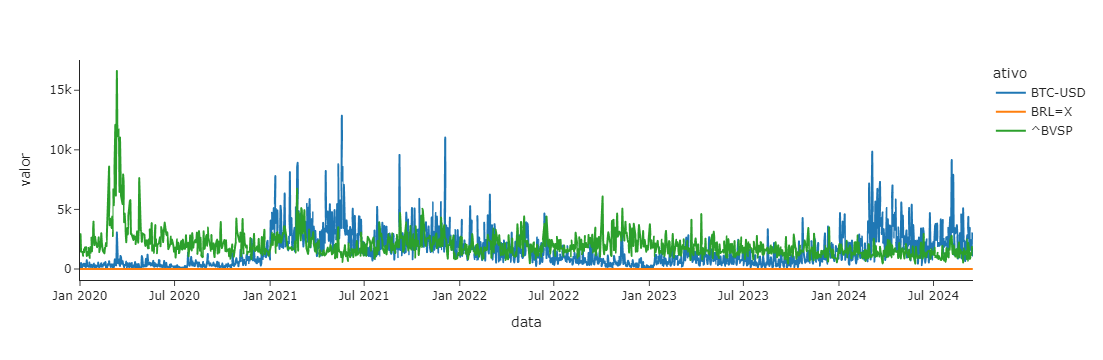

In [43]:
fig = px.line(data_frame = amplitude_df, x='data', y='valor', color='ativo', template='simple_white')
fig.show()

### Um método razoável para testar qual ativo possuiu maior volatilidade é calcular a soma da amplitude para cada ativo, pois o que esta soma explicita é o quão grande é a variação entre os picos de cada dia... assim sendo:

In [46]:
gb = amplitude_df.groupby('ativo')['valor'].sum()
gb

ativo
BRL=X      8.248721e+01
BTC-USD    2.640400e+06
^BVSP      2.372218e+06
Name: valor, dtype: float64

### Portanto, vemos que o ativo com maior volatilidade parece ter sido a BOVESPA.